# Create and evaluate causal models

main notebook for the causal analysis

In [1]:
import pandas as pd
import os
import numpy as np
import random
%load_ext autoreload
#%autoreload 2

from scripts.causal_functions import create_eval_scm
from scripts.causal_graphs import  GRAPH18, GRAPH22
from scripts.utils import normalize

In [2]:
# load data for FR
TRUE_END = pd.Timestamp("20231231T23", tz="utc")
TRUE_START = pd.Timestamp("20180101T00", tz="utc")
true_years = f"{TRUE_START.year}-{TRUE_END.year}"
COUNTRY_CODE = "FR"


data = (
    pd.read_csv(
        f"../data/processed/combined_data/data_selected_{COUNTRY_CODE}_{true_years}.csv",
        parse_dates=["timestamp"],
    )
    .set_index("timestamp")
    .rename(columns={"nuclear_avail": "na", "ramperation_da": "gen_da_ramp"})
)
# convert hour, season to cyclical value for linear regression
data.loc[:, "hour_sin"] = np.sin(data.loc[:, "hour"] * (2.0 * np.pi / 24))
data.loc[:, "hour_cos"] = np.cos(data.loc[:, "hour"] * (2.0 * np.pi / 24))
data.loc[:, "day_of_year_sin"] = np.sin(
    (data.loc[:, "day_of_year"] - 1) * (2.0 * np.pi / 365)
)
data.loc[:, "day_of_year_cos"] = np.cos(
    (data.loc[:, "day_of_year"] - 1) * (2.0 * np.pi / 365)
)

In [3]:
# Create necessary directories
os.makedirs("../models", exist_ok=True)

In [3]:
# normalize data
normalized_data = data.copy()
for col in normalized_data.columns:
    normalized_data[col] = normalize(
        data=data[col], mean=data[col].mean(), std=data[col].std()
    )

graph18
[Errno 17] File exists: '../models/graph18/'
creating causal model


Fitting causal mechanism of node gas_price:   0%|          | 0/21 [00:00<?, ?it/s]      

Fitting causal mechanism of node carbon_price: 100%|██████████| 21/21 [00:00<00:00, 52.88it/s]  


None
get coefficients
evaluate


Evaluating causal mechanisms...: 100%|██████████| 21/21 [00:00<00:00, 229.85it/s]
/home/saschreyer/.conda/envs/causal_inference_final/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/saschreyer/.conda/envs/causal_inference_final/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/saschreyer/.conda/envs/causal_inference_final/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/saschreye

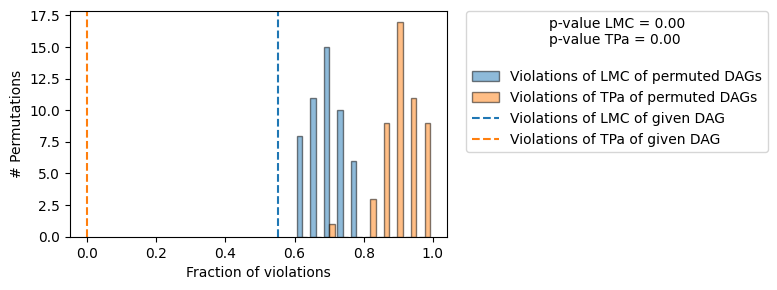

Evaluated the performance of the causal mechanisms and the invertibility assumption of the causal mechanisms and the overall average KL divergence between generated and observed distribution and the graph structure. The results are as follows:

==== Evaluation of Causal Mechanisms ====
The used evaluation metrics are:
- KL divergence (only for root-nodes): Evaluates the divergence between the generated and the observed distribution.
- Mean Squared Error (MSE): Evaluates the average squared differences between the observed values and the conditional expectation of the causal mechanisms.
- Normalized MSE (NMSE): The MSE normalized by the standard deviation for better comparison.
- R2 coefficient: Indicates how much variance is explained by the conditional expectations of the mechanisms. Note, however, that this can be misleading for nonlinear relationships.
- F1 score (only for categorical non-root nodes): The harmonic mean of the precision and recall indicating the goodness of the under

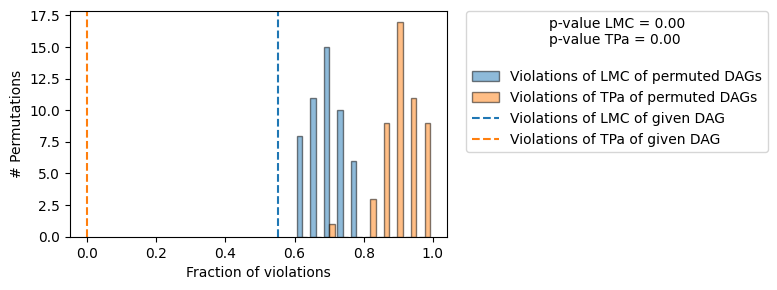

falsification


Test permutations of given graph: 100%|██████████| 50/50 [4:43:33<00:00, 340.27s/it]  


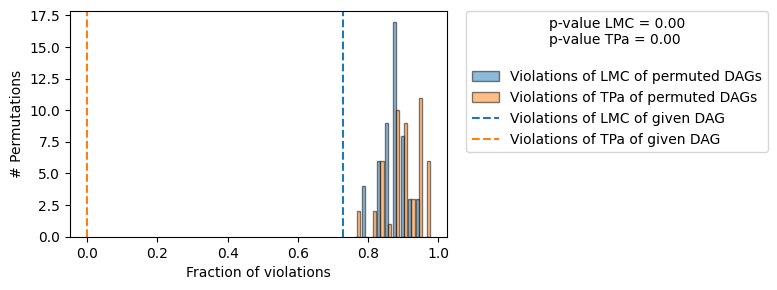

graph22
[Errno 17] File exists: '../models/graph22/'
creating causal model


Fitting causal mechanism of node carbon_price: 100%|██████████| 21/21 [00:00<00:00, 78.81it/s]   


None
get coefficients
evaluate


Evaluating causal mechanisms...: 100%|██████████| 21/21 [00:00<00:00, 509.11it/s]
/home/saschreyer/.conda/envs/causal_inference_final/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/saschreyer/.conda/envs/causal_inference_final/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/saschreyer/.conda/envs/causal_inference_final/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/saschreye

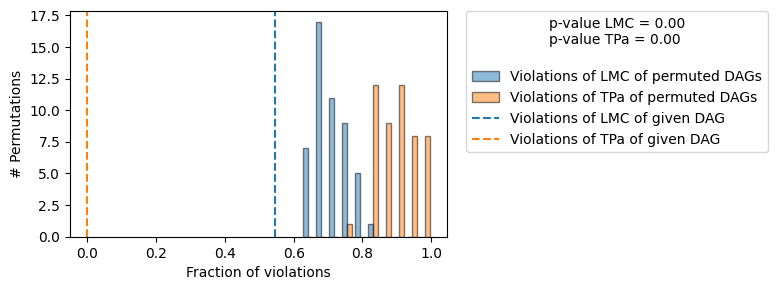

Evaluated the performance of the causal mechanisms and the invertibility assumption of the causal mechanisms and the overall average KL divergence between generated and observed distribution and the graph structure. The results are as follows:

==== Evaluation of Causal Mechanisms ====
The used evaluation metrics are:
- KL divergence (only for root-nodes): Evaluates the divergence between the generated and the observed distribution.
- Mean Squared Error (MSE): Evaluates the average squared differences between the observed values and the conditional expectation of the causal mechanisms.
- Normalized MSE (NMSE): The MSE normalized by the standard deviation for better comparison.
- R2 coefficient: Indicates how much variance is explained by the conditional expectations of the mechanisms. Note, however, that this can be misleading for nonlinear relationships.
- F1 score (only for categorical non-root nodes): The harmonic mean of the precision and recall indicating the goodness of the under

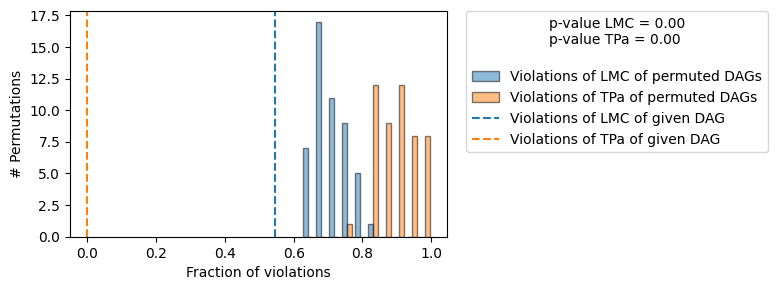

falsification


Test permutations of given graph:  54%|█████▍    | 27/50 [2:38:02<2:15:15, 352.85s/it]

In [ ]:
# model18 is for price_da
# model22 is for net_export

# set random seed for reproducibility
np.random.seed(42)
random.seed(42)
# load graphs
graphs = [GRAPH18, GRAPH22]
# evaluate graphs
for graph in graphs:
    print(graph["name"])
    create_eval_scm(
        graph_dict=graph,
        df_data=normalized_data,
        df_data_original=data,
        with_coefficients=True,
        with_evaluation=True,
        with_falsification=True,
    )